<a href="https://colab.research.google.com/github/JHBaek0306/BigData/blob/main/Classification_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from xgboost import plot_importance
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

datasets = load_breast_cancer()
features = datasets.data
labels = datasets.target
cancer_df = pd.DataFrame(data=features, columns=datasets.feature_names)
cancer_df['target'] = labels
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print(datasets.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
X_features = cancer_df.iloc[:,:-1]
y_labels = cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth':3,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
          }
num_roudns = 400

In [ ]:
eval_list = [(dtr, 'train'), (dval, 'eval')]

xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_roudns, early_stopping_rounds=50, evals=eval_list)


[0]	train-logloss:0.650163	eval-logloss:0.661831
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 50 rounds.
[1]	train-logloss:0.611313	eval-logloss:0.636086
[2]	train-logloss:0.575629	eval-logloss:0.611436
[3]	train-logloss:0.543102	eval-logloss:0.592036
[4]	train-logloss:0.513233	eval-logloss:0.573291
[5]	train-logloss:0.484475	eval-logloss:0.550371
[6]	train-logloss:0.457959	eval-logloss:0.529295
[7]	train-logloss:0.434357	eval-logloss:0.51534
[8]	train-logloss:0.411503	eval-logloss:0.497179
[9]	train-logloss:0.390274	eval-logloss:0.481542
[10]	train-logloss:0.371284	eval-logloss:0.469904
[11]	train-logloss:0.352541	eval-logloss:0.45474
[12]	train-logloss:0.335277	eval-logloss:0.442294
[13]	train-logloss:0.318925	eval-logloss:0.429608
[14]	train-logloss:0.304394	eval-logloss:0.42065
[15]	train-logloss:0.289996	eval-logloss:0.409577
[16]	train-logloss:0.276514	eval-logloss:0.398867
[17]	train-log

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predcit() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predcit() 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

get_clf_eval(y_test, preds)

오차 행렬
[[34  3]
 [ 2 75]]
정확도:0.9561, 정밀도:0.9615, 재현율:0.9740


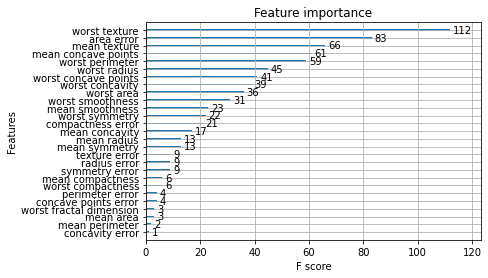

In [ ]:
plot_importance(xgb_model )

사이킷런 래퍼 XGBoost 적용

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall ,f1, roc_auc))

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도:0.9649, 정밀도:0.9620, 재현율:0.9870, F1:0.9744, AUC:0.9954


In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.650162	validation_1-logloss:0.661831
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 50 rounds.
[1]	validation_0-logloss:0.611314	validation_1-logloss:0.636086
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.611436
[3]	validation_0-logloss:0.543099	validation_1-logloss:0.592036
[4]	validation_0-logloss:0.513234	validation_1-logloss:0.573291
[5]	validation_0-logloss:0.484475	validation_1-logloss:0.550371
[6]	validation_0-logloss:0.457959	validation_1-logloss:0.529295
[7]	validation_0-logloss:0.434357	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.411503	validation_1-logloss:0.497179
[9]	validation_0-logloss:0.390274	validation_1-logloss:0.481542
[10]	validation_0-logloss:0.371284	validation_1-logloss:0.469904
[11]	validation_0-logloss:0.352541	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.335278	validation_1-logloss:0.442294
[13

In [ ]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도:0.9561, 정밀도:0.9615, 재현율:0.9740, F1:0.9677, AUC:0.9933


In [ ]:
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.650162	validation_1-logloss:0.661831
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.611314	validation_1-logloss:0.636086
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.611436
[3]	validation_0-logloss:0.543099	validation_1-logloss:0.592036
[4]	validation_0-logloss:0.513234	validation_1-logloss:0.573291
[5]	validation_0-logloss:0.484475	validation_1-logloss:0.550371
[6]	validation_0-logloss:0.457959	validation_1-logloss:0.529295
[7]	validation_0-logloss:0.434357	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.411503	validation_1-logloss:0.497179
[9]	validation_0-logloss:0.390274	validation_1-logloss:0.481542
[10]	validation_0-logloss:0.371284	validation_1-logloss:0.469904
[11]	validation_0-logloss:0.352541	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.335278	validation_1-logloss:0.442294
[13

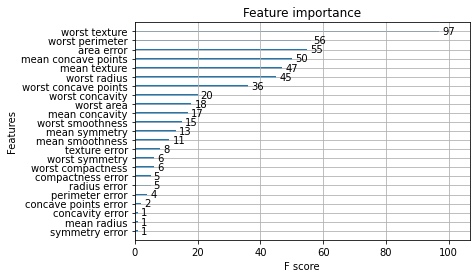

In [ ]:
plot_importance(xgb_wrapper)